# Big Market Sales Prediction 

## Machine learning has a vital role in sales games as it provides a high valuable insights leads to higher sales volume.

## so in this project we will build a model that tries to predict sales of each product in each store 

## 3).Loading Packages and Data

In [1333]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import Linear_Regression
#from sklearn.model_selection import cross_val_score

In [1334]:
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

## 4).Data Structure and Content

In [1335]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 5).Exploratory Data Analysis

In [1336]:
train_data.shape

(8523, 12)

In [1337]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [1338]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

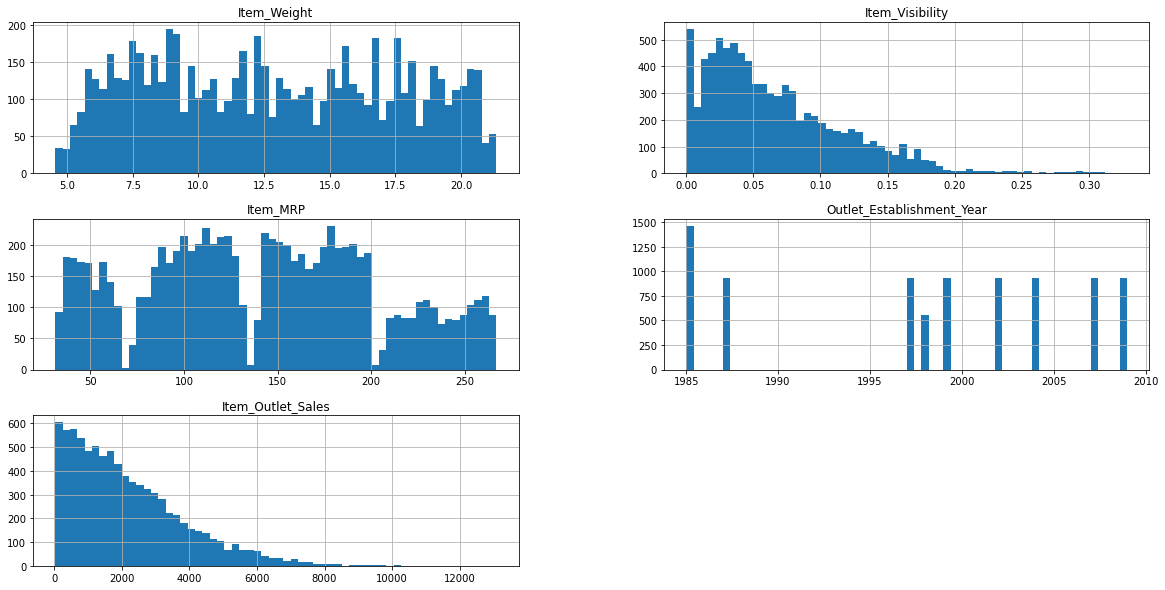

In [1339]:
train_data.hist(bins=60, figsize=(20,10))

## 6).Univariate Analysis

### Item_Identifier

In [1340]:
train_data.Item_Identifier.nunique()

1559

###### Item_Identifier has same number of unique values as the products number in Project Description

In [1341]:
train_data["Item_Identifier"]

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [1342]:
train_data[train_data["Item_Identifier"] == "FDA15"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208


In [1343]:
train_data[train_data["Item_Identifier"] == "DRC01"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2272,DRC01,5.92,Regular,0.019309,Soft Drinks,49.0692,OUT017,2007,NaN,Tier 2,Supermarket Type1,1478.0760
2927,DRC01,NaN,Regular,0.019107,Soft Drinks,48.4692,OUT027,1985,Medium,Tier 3,Supermarket Type3,1034.6532
5029,DRC01,5.92,Regular,0.019239,Soft Drinks,49.8692,OUT045,2002,NaN,Tier 2,Supermarket Type1,1133.1916
5077,DRC01,5.92,Regular,0.019200,Soft Drinks,47.7692,OUT046,1997,Small,Tier 1,Supermarket Type1,492.6920
5218,DRC01,5.92,Regular,0.019184,Soft Drinks,50.3692,OUT013,1987,High,Tier 3,Supermarket Type1,591.2304


###### Before dealing with missing values, it seems that the Nan Values in "Item_Weight" was not recorded but it is the same as all entries for the same Item_Identifier

### Item_Weight

In [1344]:
train_data.Item_Weight.nunique()

415

In [1345]:
train_data.Item_Weight.value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

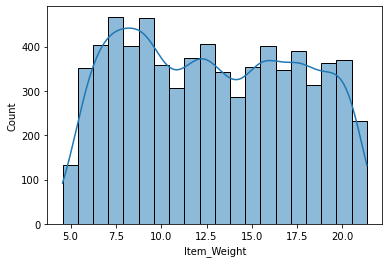

In [1346]:
sns.histplot(train_data['Item_Weight'], kde=True, legend=False)

###### seems like there is number of items has the exactly same weight

In [1347]:
print(train_data.Item_Weight.min())
print(train_data.Item_Weight.median())
print(train_data.Item_Weight.mean())
print(train_data.Item_Weight.std())
print(train_data.Item_Weight.max())

4.555
12.6
12.857645184136183
4.643456499186395
21.35


<AxesSubplot:>

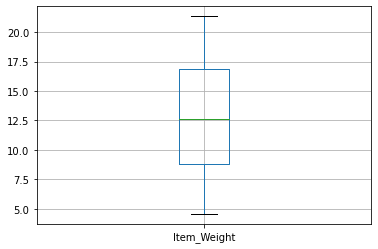

In [1348]:
train_data.boxplot(column='Item_Weight')

###### Seems like there are no outliers in "Item_Weight" data

### Item_Fat_Content

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


C:\Users\mahmo\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


(array([5089.,    0., 2889.,    0.,    0.,  112.,    0.,  316.,    0.,
         117.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

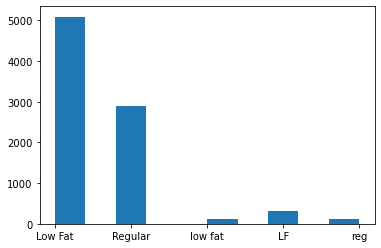

In [1349]:
print(train_data.Item_Fat_Content.value_counts())
plt.hist(train_data.Item_Fat_Content)

###### it seems like this column has only 2 unique values with 5 different entries 

### Item_Visibility

In [1350]:
train_data.Item_Visibility.nunique()

7880

0.0
0.053930934
0.06613202877895127
0.051597822321135196
0.328390948


<AxesSubplot:>

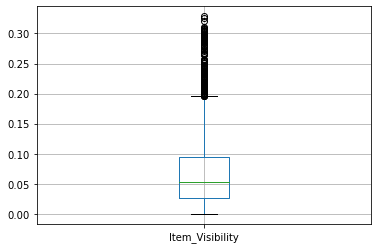

In [1351]:
print(train_data.Item_Visibility.min())
print(train_data.Item_Visibility.median())
print(train_data.Item_Visibility.mean())
print(train_data.Item_Visibility.std())
print(train_data.Item_Visibility.max())
train_data.boxplot(column='Item_Visibility')

In [1352]:
train_data.Item_Visibility.value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

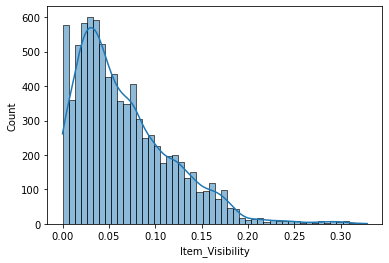

In [1353]:
sns.histplot(train_data['Item_Visibility'], kde=True, legend=False)

In [1354]:
train_data[['Item_Visibility', 'Item_Outlet_Sales']].corr()

,Item_Visibility,Item_Outlet_Sales
Item_Visibility,1.000000,-0.128625
Item_Outlet_Sales,-0.128625,1.000000


### Item_Type

In [1355]:
train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

### Item_MRP

31.29
143.0128
140.9927819781768
62.27506651219039
266.8884


<AxesSubplot:>

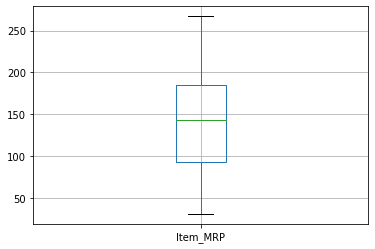

In [1356]:
print(train_data.Item_MRP.min())
print(train_data.Item_MRP.median())
print(train_data.Item_MRP.mean())
print(train_data.Item_MRP.std())
print(train_data.Item_MRP.max())
train_data.boxplot(column='Item_MRP')

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

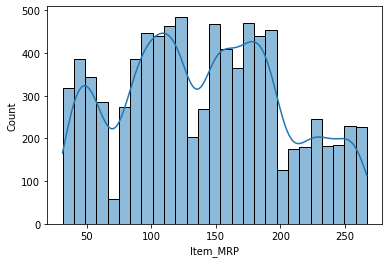

In [1357]:
sns.histplot(train_data['Item_MRP'], kde=True, legend=False)

### Outlet_Identifier

In [1358]:
train_data.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [1359]:
train_data.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

### Outlet_Establishment_Year

In [1360]:
train_data.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [1361]:
train_data.groupby(['Outlet_Identifier','Outlet_Establishment_Year']).sum()

,,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Outlet_Identifier,Outlet_Establishment_Year,,,,
OUT010,1998,7166.800,56.308832,78131.5646,1.883402e+05
OUT013,1987,12121.730,55.879859,131809.0156,2.142664e+06
OUT017,2007,11877.495,56.834646,129103.9564,2.167465e+06
OUT018,2009,11946.465,56.621454,131477.7724,1.851823e+06
OUT019,1985,0.000,57.257041,73807.5824,1.796941e+05
OUT027,1985,0.000,54.804764,130714.6746,3.453926e+06
OUT035,2004,11931.295,56.974873,133103.9070,2.268123e+06
OUT045,2002,11751.840,56.180780,130942.7782,2.036725e+06
OUT046,1997,11966.125,56.231875,132113.3698,2.118395e+06


In [1362]:
train_data[(train_data['Outlet_Identifier'] == 'OUT027') | (train_data['Outlet_Identifier'] == 'OUT19')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
...,...,...,...,...,...,...,...,...,...,...,...,...
8472,NCS41,NaN,Low Fat,0.053185,Health and Hygiene,182.9608,OUT027,1985,Medium,Tier 3,Supermarket Type3,1653.8472
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120


###### It seems like the two stores "OUT019" and "OUT027" did not recorded the item_weight values. 
the two stores were founded at 1985 as the oldest so we can assume that there is no scales! 

### Outlet_Size

In [1363]:
train_data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [1364]:
train_data['Outlet_Size'].value_counts(dropna= False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

### Outlet_Location_Type

In [1365]:
train_data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [1366]:
train_data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

### Outlet_Type

In [1367]:
train_data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [1368]:
train_data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## 7).Bivariate Analysis

In [1369]:
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

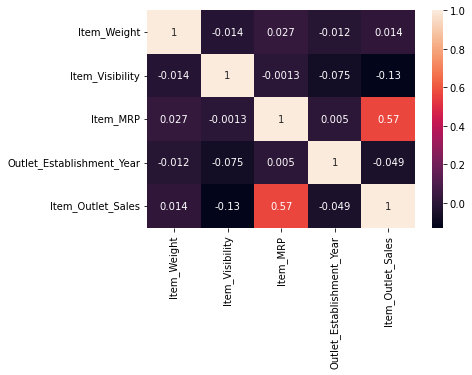

In [1370]:
sns.heatmap(train_data.corr(), annot = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

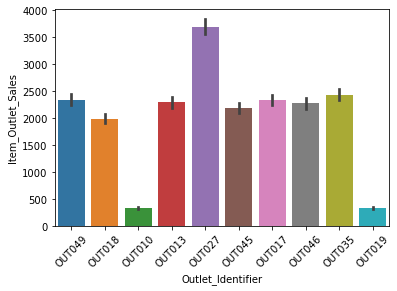

In [1371]:
sns.barplot(x="Outlet_Identifier", y="Item_Outlet_Sales", data= train_data)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

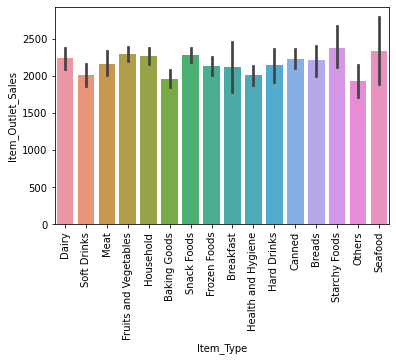

In [1372]:
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data= train_data)
plt.xticks(rotation=90)

## 8).Missing Value Treatment

In [1373]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### It seems that we do not have any missing values except in the two columns "Item_Weight" and "Outlet_Size".

###### From pervious analysis we saw that the Item_weight was missied only from two stores and it could be known from another records with the sameItem_Identifier

###### It needs a for loop, I tried to write it but I could not so I just will drop these na values.

###### Let's find out more about the Outlet_size

In [1374]:
train_data[train_data['Outlet_Size'].isnull()][0:20]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972


###### It seems like only OUT010 & OUT017 & OUT045 are missied in Outlet_Size

In [1375]:
train_data[train_data['Outlet_Size'].isnull()]['Outlet_Identifier'].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [1376]:
train_data[['Outlet_Identifier']].value_counts()

Outlet_Identifier
OUT027               935
OUT013               932
OUT035               930
OUT046               930
OUT049               930
OUT045               929
OUT018               928
OUT017               926
OUT010               555
OUT019               528
dtype: int64

###### That was right! so we could replace them with the most common Outlet_Size entry.

In [1377]:
train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [1378]:
train_data['Outlet_Size'].fillna('Medium', inplace = True)
train_data['Outlet_Size'].isnull().sum()

0

In [1379]:
train_data_cleaned  = train_data.dropna()
train_data_cleaned.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [1380]:
print(train_data_cleaned.shape)

(7060, 12)


### 9).Feature Engineering

In [1381]:
train_data_cleaned['Item_Fat_Content'].value_counts()

Low Fat    4222
Regular    2388
LF          260
reg         106
low fat      84
Name: Item_Fat_Content, dtype: int64

In [1382]:
train_data_cleaned['Item_Fat_Content'] = train_data_cleaned['Item_Fat_Content'].str.lower()

C:\Users\mahmo\AppData\Local\Temp/ipykernel_5800/4208757225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned['Item_Fat_Content'] = train_data_cleaned['Item_Fat_Content'].str.lower()


In [1383]:
BB = train_data_cleaned['Item_Fat_Content'] == 'lf'
train_data_cleaned.loc[BB, 'Item_Fat_Content'] = 'low fat'
CC = train_data_cleaned['Item_Fat_Content'] == 'reg'
train_data_cleaned.loc[CC, 'Item_Fat_Content'] = 'regular'

C:\Users\mahmo\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [1384]:
train_data_cleaned['Item_Fat_Content'].value_counts()

low fat    4566
regular    2494
Name: Item_Fat_Content, dtype: int64

### 10).Encoding Categorical Variables

### 11).Label Encoding

In [1385]:
#replacing Item_Fat_Content to 0 & 1
#Item_Fat_Content of low fat = 0
#Item_Fat_Content of regular = 1

train_data_cleaned['Item_Fat_Content'].replace(['low fat', 'regular'],
                        [0, 1], inplace=True)

C:\Users\mahmo\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [1386]:
train_data_cleaned.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1387]:
!pip install sklearn
import sklearn
!pip install category_encoders
import category_encoders as ce

In [1388]:
train_data_cleaned['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [1389]:
mapping_Outlet_Size = [
    {
        'col': 'Outlet_Size',
        'mapping':{
            'Small': 0,
            'Medium': 1,
            'High': 2,
        }
    }
]
encoder = ce.OrdinalEncoder(cols = ['Outlet_Size'], return_df = True,mapping = mapping_Outlet_Size)
train_data_cleaned['Outlet_Size'] = encoder.fit_transform(train_data_cleaned['Outlet_Size'])

C:\Users\mahmo\AppData\Local\Temp/ipykernel_5800/3980280298.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned['Outlet_Size'] = encoder.fit_transform(train_data_cleaned['Outlet_Size'])


In [1390]:
train_data_cleaned.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,2,Tier 3,Supermarket Type1,994.7052


### 12).One Hot Encoding

In [1391]:
train_data_cleaned = pd.get_dummies(train_data_cleaned, columns = ['Item_Type', 'Outlet_Identifier', 
                                                                   'Outlet_Location_Type', 'Outlet_Type'])

In [1392]:
train_data_cleaned

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,FDA15,9.300,0,0.016047,249.8092,1999,1,3735.1380,0,0,...,0,0,0,1,1,0,0,0,1,0
1,DRC01,5.920,1,0.019278,48.2692,2009,1,443.4228,0,0,...,0,0,0,0,0,0,1,0,0,1
2,FDN15,17.500,0,0.016760,141.6180,1999,1,2097.2700,0,0,...,0,0,0,1,1,0,0,0,1,0
3,FDX07,19.200,1,0.000000,182.0950,1998,1,732.3800,0,0,...,0,0,0,0,0,0,1,1,0,0
4,NCD19,8.930,0,0.000000,53.8614,1987,2,994.7052,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,214.5218,1987,2,2778.3834,0,0,...,0,0,0,0,0,0,1,0,1,0
8519,FDS36,8.380,1,0.046982,108.1570,2002,1,549.2850,1,0,...,0,1,0,0,0,1,0,0,1,0
8520,NCJ29,10.600,0,0.035186,85.1224,2004,0,1193.1136,0,0,...,1,0,0,0,0,1,0,0,1,0
8521,FDN46,7.210,1,0.145221,103.1332,2009,1,1845.5976,0,0,...,0,0,0,0,0,0,1,0,0,1


In [1409]:
#Create an object for Base N Encoding
Item_Identifier_encoder = ce.BaseNEncoder(cols=['Item_Identifier'], return_df = True, base = 5)

train_data_for_modeling = Item_Identifier_encoder.fit_transform(train_data_cleaned)
train_data_for_modeling

,Item_Identifier_0,Item_Identifier_1,Item_Identifier_2,Item_Identifier_3,Item_Identifier_4,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,...,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,0,0,0,0,1,9.300,0,0.016047,249.8092,1999,...,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,2,5.920,1,0.019278,48.2692,2009,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,3,17.500,0,0.016760,141.6180,1999,...,0,0,0,1,1,0,0,0,1,0
3,0,0,0,0,4,19.200,1,0.000000,182.0950,1998,...,0,0,0,0,0,0,1,1,0,0
4,0,0,0,1,0,8.930,0,0.000000,53.8614,1987,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,2,1,4,1,6.865,0,0.056783,214.5218,1987,...,0,0,0,0,0,0,1,0,1,0
8519,2,2,0,1,1,8.380,1,0.046982,108.1570,2002,...,0,1,0,0,0,1,0,0,1,0
8520,0,2,1,3,3,10.600,0,0.035186,85.1224,2004,...,1,0,0,0,0,1,0,0,1,0
8521,1,1,1,3,1,7.210,1,0.145221,103.1332,2009,...,0,0,0,0,0,0,1,0,0,1


### -----------------------------------------------------------------------------------

## 14).Modeling

In [1410]:
X = train_data_for_modeling.drop('Item_Outlet_Sales', axis='columns')
y = train_data_for_modeling['Item_Outlet_Sales']

In [1411]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
y_train

426     4943.5650
3517    1071.9380
6608     691.1004
7637    1366.2216
4983    1464.7600
          ...    
1442    2181.1608
4119     476.0470
1639    2626.5810
5545    4344.3450
1576    1603.2464
Name: Item_Outlet_Sales, Length: 5648, dtype: float64

In [1412]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.4993436386643384

In [1413]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.49914481, 0.49314949, 0.51673951, 0.4981332 , 0.51471933])

## That's it, Unfortunatlly I could not end the project very well as needed.